<a href="https://colab.research.google.com/github/Tiwari666/Json2Excel/blob/main/Json2Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#json_data

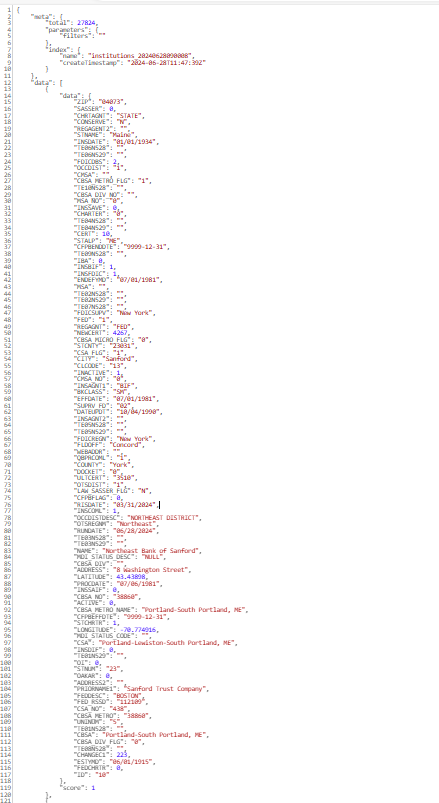


Fetching JSON data: The requests library sends an HTTP GET request to fetch the JSON data from the specified FDIC API URL.

Converting to DataFrame: The pd.json_normalize function converts the nested JSON data into a flat Pandas DataFrame, which simplifies data manipulation.

Saving to Excel: The to_excel method of the DataFrame saves the data to an Excel file using the openpyxl engine.

Exploratory Data Analysis:

Descriptive statistics: df.describe() prints basic statistics for numeric columns.

Data visualization:

Histogram: Visualizes the distribution of a numeric column (e.g., 'data.ASSET').

Bar plot: Visualizes the count of institutions by state (or another categorical column, e.g., 'data.STNAME').

Correlation heatmap: Visualizes correlations between numeric columns.
Identifying high correlations: Prints correlations above a specified threshold.



#To perform data analysis on the FDIC institutions data, we need to identify and extract columns that are meaningful for analysis.


# Potential Columns for Extraction and Analysis

# Geographical Information:

data.STNAME (State Name)

data.CITY (City)

data.ZIP (ZIP Code)

data.CBSA_METRO_NAME (Metro Area)

data.COUNTY (County)

data.LATITUDE (Latitude)

data.LONGITUDE (Longitude)


#Operational Information:

data.NAME (Institution Name)

data.CERT (FDIC Certificate Number)

data.INSDATE (Insurance Date)

data.EFFDATE (Effective Date)

data.INACTIVE (Inactive Status)


#Financial Information:

data.ASSET (Total Assets)

data.DEPDOM (Domestic Deposits)

data.NETINC (Net Income)

data.ROA (Return on Assets)

data.ROE (Return on Equity)

data.CAPITAL (Capital)

data.OFFDOM (Domestic Offices)

data.OFFFOR (Foreign Offices)


#Classification and Regulatory Information:

data.CHRTAGNT (Charter Agent)

data.BKCLASS (Bank Class)

data.FDICREGN (FDIC Region)

data.REGAGNT (Regulatory Agent)

data.SUPRV_FD (Supervisory FD)

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Fetch the JSON data from the FDIC API
url = 'https://banks.data.fdic.gov/api/institutions?filters=&limit=100'  # FDIC API URL with limit for simplicity
response = requests.get(url)
data = response.json()

In [ ]:
# Step 2: Convert JSON data to a Pandas DataFrame
df = pd.json_normalize(data['data'])
df.head()

,score,data.ZIP,data.SASSER,data.CHRTAGNT,data.CONSERVE,data.REGAGENT2,data.STNAME,data.INSDATE,data.TE06N528,data.TE06N529,...,data.INSTAG,data.CITYHCR,data.TRACT,data.NETINCQ,data.TRUST,data.PRIORNAME2,data.PRIORNAME3,data.PRIORNAME4,data.OFFICES,data.CHANGEC2
0,1,04073,0,STATE,N,,Maine,01/01/1934,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,72712,0,STATE,N,,Arkansas,01/01/1934,,,...,0,BENTONVILLE,0,2552.0,1,NaN,NaN,NaN,NaN,NaN
2,1,26003,0,OCC,N,,West Virginia,01/01/1934,,,...,0,WHEELING,0,367.0,1,"The Bank of Warwood, National Association",The Bank of Warwood,"First West Virginia Bank, National Association...",NaN,NaN
3,1,24986,0,STATE,N,,West Virginia,01/01/1934,,,...,0,RALEIGH,,224.0,1,NaN,NaN,NaN,NaN,NaN
4,1,53946,0,STATE,N,,Wisconsin,01/01/1934,,,...,1,MARKESAN,0,244.0,0,NaN,NaN,NaN,5.0,NaN


In [ ]:
# Step 3: Select necessary columns for analysis
columns_of_interest = [
    'data.NAME', 'data.STNAME', 'data.CITY', 'data.ZIP', 'data.CBSA_METRO_NAME', 'data.COUNTY',
    'data.LATITUDE', 'data.LONGITUDE', 'data.CERT', 'data.INSDATE', 'data.EFFDATE', 'data.INACTIVE',
    'data.ASSET', 'data.DEPDOM', 'data.NETINC', 'data.ROA', 'data.ROE', 'data.OFFDOM', 'data.OFFFOR',
    'data.CHRTAGNT', 'data.BKCLASS', 'data.FDICREGN', 'data.REGAGNT', 'data.SUPRV_FD'
]

In [ ]:
df = df[columns_of_interest]

In [ ]:

# Step 4: Save the DataFrame to an Excel file
excel_file = 'fdic_institutions_filtered.xlsx'
df.to_excel(excel_file, index=False)
print(f'Data saved to {excel_file}')

Data saved to fdic_institutions_filtered.xlsx


In [ ]:
# Step 5: Perform a simple data science project (Exploratory Data Analysis)
# Load the data from the Excel file
df = pd.read_excel(excel_file)

In [ ]:
# Convert date columns to datetime
df['data.INSDATE'] = pd.to_datetime(df['data.INSDATE'], errors='coerce')
df['data.EFFDATE'] = pd.to_datetime(df['data.EFFDATE'], errors='coerce')

In [ ]:
# Basic statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
data.ZIP,100.0,44546.88,3867.0,31076.75,48084.0,53152.25,72712.0,14417.325892
data.LATITUDE,100.0,35.220312,0.0,34.194074,40.49906,42.363481,46.5914,13.538286
data.LONGITUDE,100.0,-76.145688,-95.551753,-89.494823,-85.788163,-82.673182,0.0,28.635917
data.CERT,100.0,8859.32,10.0,10014.75,10056.5,10092.25,10125.0,3138.207933
data.INSDATE,100,1934-08-16 08:38:24,1934-01-01 00:00:00,1934-01-01 00:00:00,1934-01-01 00:00:00,1934-01-01 00:00:00,1996-04-01 00:00:00,NaN
data.EFFDATE,100,2002-01-13 20:52:48,1970-01-02 00:00:00,1989-07-02 18:00:00,2000-04-25 00:00:00,2019-08-18 18:00:00,2023-03-22 00:00:00,NaN
data.INACTIVE,100.0,0.79,0.0,1.0,1.0,1.0,1.0,0.40936
data.ASSET,86.0,548963.593023,11984.0,63127.0,118406.5,313434.0,22460247.0,2445104.1409
data.DEPDOM,86.0,429812.325581,11935.0,54869.25,104545.0,263878.25,15900424.0,1740850.114033
data.NETINC,86.0,549.023256,-144722.0,117.0,402.5,1072.25,143978.0,22535.127621


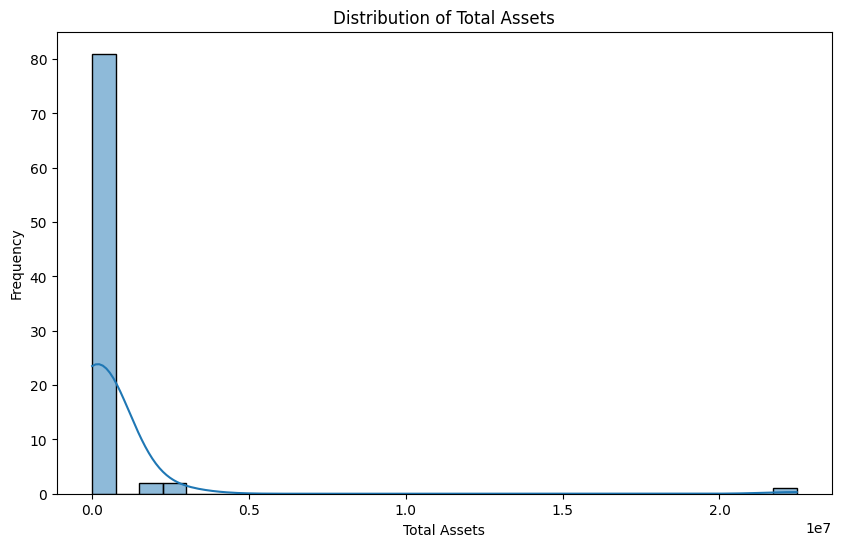

In [ ]:
# Data visualization
# Histogram of Total Assets
plt.figure(figsize=(10, 6))
sns.histplot(df['data.ASSET'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Assets')
plt.xlabel('Total Assets')
plt.ylabel('Frequency')
plt.show()

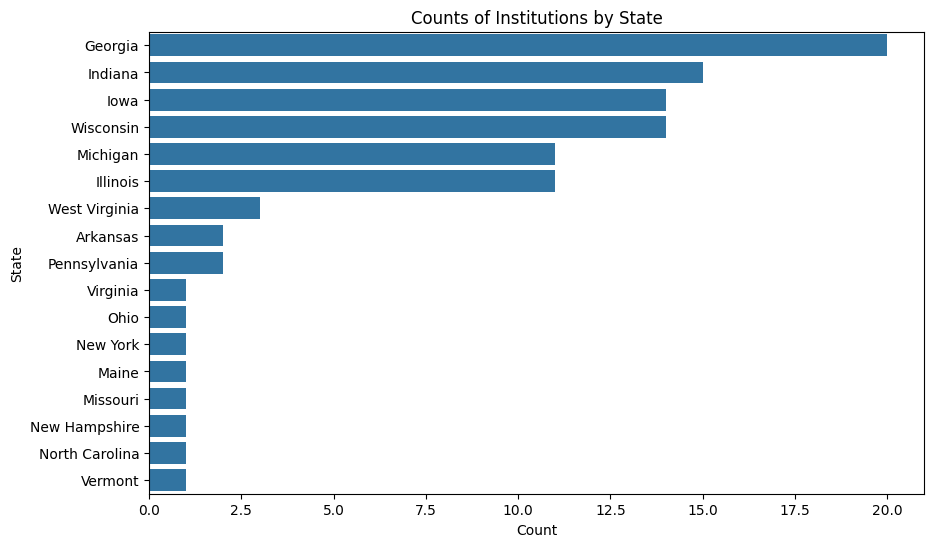

In [ ]:
# Bar plot of Institutions by State
plt.figure(figsize=(10, 6))
sns.countplot(y='data.STNAME', data=df, order=df['data.STNAME'].value_counts().index)
plt.title('Counts of Institutions by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

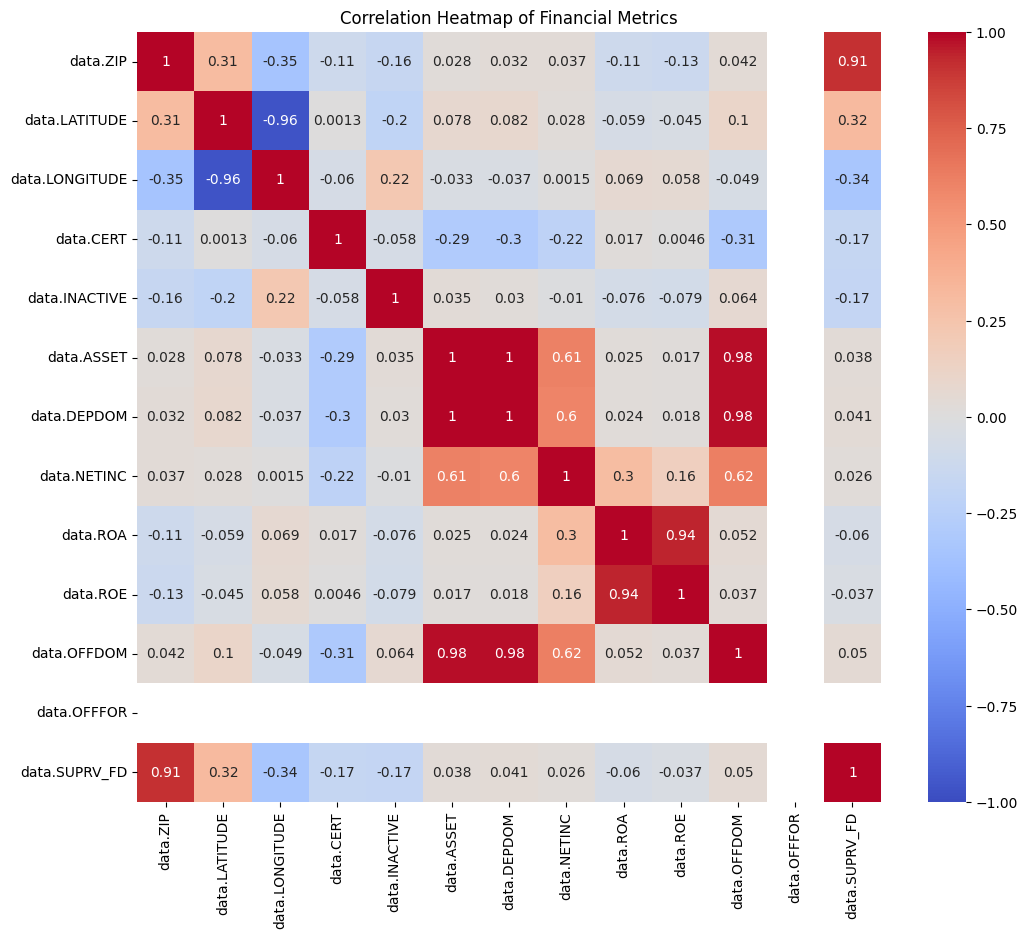

In [ ]:
# Correlation heatmap of numeric columns
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

In [ ]:
# Identify institutions with high ROA and ROE
high_performance = df[(df['data.ROA'] > 1.5) & (df['data.ROE'] > 15)]
print('High performing institutions (ROA > 1.5 and ROE > 15):\n', high_performance[['data.NAME', 'data.ROA', 'data.ROE']])

High performing institutions (ROA > 1.5 and ROE > 15):
                                      data.NAME  data.ROA  data.ROE
39  Central and Southern Bank of North Georgia  1.591074     21.93
42                          Colony Bank Wilcox  1.549001     19.05
45                    Farmers & Merchants Bank  3.293260     18.72
49                The Commercial National Bank  2.454810     23.21
50                           The Citizens Bank  1.924221     27.19
68                         The Commercial Bank  1.683951     17.95
80                               Alliance Bank  1.539563     17.60


In [ ]:
# Analysis of inactive institutions
inactive_institutions = df[df['data.INACTIVE'] == 1]
print('Inactive institutions:\n', inactive_institutions[['data.NAME', 'data.STNAME', 'data.CITY', 'data.INSDATE']])

Inactive institutions:
                                  data.NAME    data.STNAME  \
0                Northeast Bank of Sanford          Maine   
1                      Bank of Bentonville       Arkansas   
2   Progressive Bank, National Association  West Virginia   
3      First Citizens Bank & Trust Company  West Virginia   
5                   Valley Bank, Green Bay      Wisconsin   
..                                     ...            ...   
89              Farmers State Bank of Dows           Iowa   
90                      Early Savings Bank           Iowa   
92                              Hills Bank           Iowa   
93          First of America Bank-Bay Area       Michigan   
98                     Andrew Savings Bank           Iowa   

                data.CITY data.INSDATE  
0                 Sanford   1934-01-01  
1             Bentonville   1934-01-01  
2                Wheeling   1934-01-01  
3   White Sulphur Springs   1934-01-01  
5               Green Bay   1934-01-01